# Time Series Modeling (ARIMA Methods) Assignment

In [ ]:
import pandas as pd
import plotly.express as px
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm 
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



### Import the Amazon stock price data set (AMZN_data.csv) and plot a line chart with the observed daily closing prices.

In [ ]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%204/AMZN_data.csv')

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
 6   Name    1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 69.0+ KB


In [ ]:
import statsmodels.api as sm

adf_test = sm.tsa.stattools.adfuller(df['close'])
results = pd.Series(adf_test[0:4], 
                    index=['ADF Test Statistic',
                            'P-Value', 
                            '# Lags Used',
                            '# Observations Used'])
for key, value in adf_test[4].items():
  results[f'Critical Value {key}'] = value

print(results)

ADF Test Statistic        2.483785
P-Value                   0.999044
# Lags Used               3.000000
# Observations Used    1255.000000
Critical Value 1%        -3.435571
Critical Value 5%        -2.863846
Critical Value 10%       -2.567998
dtype: float64


The closing prices are not stationary.

In [ ]:
df['shift'] = df['close'].shift(1).fillna(method='bfill')
df['diff'] = df['close'] - df['shift']

In [ ]:
df.head()

,date,open,high,low,close,volume,Name,shift,diff
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,261.95,0.00
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,261.95,-4.74
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,257.21,1.49
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,258.70,10.77
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,269.47,-0.23


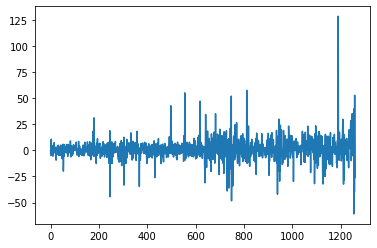

In [ ]:
df['diff'].plot()

In [ ]:
adf_test = sm.tsa.stattools.adfuller(df['diff'])
results = pd.Series(adf_test[0:4], 
                    index=['ADF Test Statistic',
                            'P-Value', 
                            '# Lags Used',
                            '# Observations Used'])
for key, value in adf_test[4].items():
  results[f'Critical Value {key}'] = value

print(results)

ADF Test Statistic      -21.376625
P-Value                   0.000000
# Lags Used               2.000000
# Observations Used    1256.000000
Critical Value 1%        -3.435567
Critical Value 5%        -2.863844
Critical Value 10%       -2.567997
dtype: float64


Now that we have made our closing prices stationary we can plug them into the ARIMA model. 

### Run an Autoregressive Integrated Moving Average (ARIMA) model on the series and add the results to a column in the dataframe.

In [ ]:
model_121 = ARIMA(df['close'], order=(1,2,1)).fit()
df['ARIMA_121'] = model_121.predict(typ='levels')

In [ ]:
model_521 = ARIMA(df['close'], order=(5,2,1)).fit()
df['ARIMA_521'] = model_521.predict(typ='levels')

In [ ]:
model_821 = ARIMA(df['close'], order=(8,2,1)).fit()
df['ARIMA_821'] = model_821.predict(typ='levels')

In [ ]:
model_524 = ARIMA(df['close'], order=(5,2,4)).fit()
df['ARIMA_524'] = model_524.predict(typ='levels')

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



In [ ]:
model_824 = ARIMA(df['close'], order=(8,2,4)).fit()
df['ARIMA_824'] = model_824.predict(typ='levels')

### Generate a multi-line chart that compares the ARIMA model's results to the observed values.

In [ ]:
def ilinechart(df, x, y, groups=None, title=''):
  fig = px.line(df, x=x, y=y, color=groups, title=title, 
                template='none').update(layout=dict(title=dict(x=0.5)))

  fig.show()

In [ ]:
melted = pd.melt(df, id_vars='date', value_vars=['close', 'ARIMA_121', 'ARIMA_521', 'ARIMA_821','ARIMA_524','ARIMA_824'], 
                 var_name='variable', value_name='value')

ilinechart(melted, 'date', 'value', groups='variable', title='Close vs. ARIMA Models')

### Evaluate the performance of all the models and compare to each other, using Mean Absolute Error and Root Mean Squared Error as your evaluation metrics.

In [ ]:
models = ['ARIMA_121', 'ARIMA_521', 'ARIMA_821','ARIMA_524','ARIMA_824']

for model in models:
    diff = df['close'] - df[model]
    mae = diff.abs().mean()
    rmse = np.sqrt(np.mean(diff**2))
    print(f'Model {model} - MAE: {mae} | RMSE: {rmse}')

Model ARIMA_121 - MAE: 6.584097765512322 | RMSE: 10.42300979926232
Model ARIMA_521 - MAE: 6.588615467474182 | RMSE: 10.384664445252463
Model ARIMA_821 - MAE: 6.5932381261051685 | RMSE: 10.379111300771694
Model ARIMA_524 - MAE: 6.582295033279533 | RMSE: 10.37290456427392
Model ARIMA_824 - MAE: 6.598305298715784 | RMSE: 10.367321560027582


The ARIMA model with (1,2,1) parameters has the lowest MAE score and highest RMSE score. The ARIMA model with (8,2,4) parameters has the lowest RMSE and highest MAE score. So it is difficult to determine which model is best. Further exploration is determined in order to decided the best ARIMA model for our dataset. 